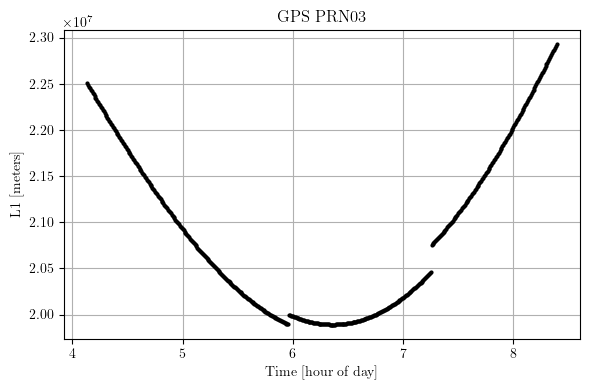

In [1]:
import scipy.io
import sys
import os
import matplotlib.pyplot as plt
sys.path.append('../')
from Wavelet_1D import Wavelet_1D


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

SAVE_OUNTPUTS = False
if SAVE_OUNTPUTS:
    OUTPUT_FORMAT = '.pdf'
    OUTPUT_DIR = './Outputs'
    if not os.path.isdir(OUTPUT_DIR):
        os.mkdir(OUTPUT_DIR)

mat_file = scipy.io.loadmat('CycleSlip2_L1_PRN03_GPS_512.mat')
Signal = mat_file['Signal']  
Time = mat_file['Time']  

plt.figure(figsize=(6,4))
# plt.plot(Time, Signal, color='k', linewidth=2.4)
plt.plot(Time, Signal, color='k', marker='.', linestyle='', markersize=4)
plt.grid()
plt.title('GPS PRN03')
plt.xlabel('Time [hour of day]')
plt.ylabel('L1 [meters]')
plt.tight_layout()
if SAVE_OUNTPUTS:
    plt.savefig(OUTPUT_DIR+'/CycleSlip_MainSignal'+OUTPUT_FORMAT, bbox_inches='tight')
plt.show()



In [2]:
S_haar, D_haar = Wavelet_1D(Signal, 'Haar', 3)
S_db4, D_db4 = Wavelet_1D(Signal, 'Db4', 3)
S_db6, D_db6 = Wavelet_1D(Signal, 'Db6', 3)
S_mh, D_mh = Wavelet_1D(Signal, 'MexicanHat', 3)
S_sym2, D_sym2 = Wavelet_1D(Signal, 'sym2', 3)

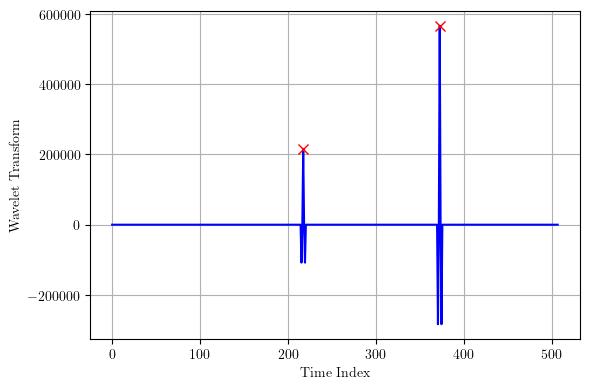

Using Emperical Wavlet Transform - Cycle slip was detected in the time indices of 219, 374 (5.96, 7.25 hour of day)


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


n = len(Signal)
F = np.zeros((n, n-5))
g = np.array([[1], [-1], [-2], [2], [1], [-1]])
for i in range(n-5):
    F[:, i] = np.hstack((np.zeros((1, i)) , g.T, np.zeros((1, n-i-6))))

Y = F.T@Signal
peaks, _ = find_peaks(Y.flatten(), height=500)

plt.figure(figsize=(6,4))
plt.plot(np.linspace(0, len(Y), len(Y)), Y, color='b')
plt.plot(np.linspace(0, len(Y), len(Y))[peaks], Y[peaks], 'x', color='r', markersize=7) 
plt.grid()
plt.ylabel('Wavelet Transform')
plt.xlabel('Time Index')
plt.tight_layout()
plt.show()

cs_idx_values = ', '.join(str(idx) for idx in peaks+2)
time_values = ', '.join(f'{time[0]:.2f}' for time in Time[peaks+2]) 
print(f'Using Emperical Wavlet Transform - Cycle slip was detected in the time indices of {cs_idx_values} ({time_values} hour of day)')


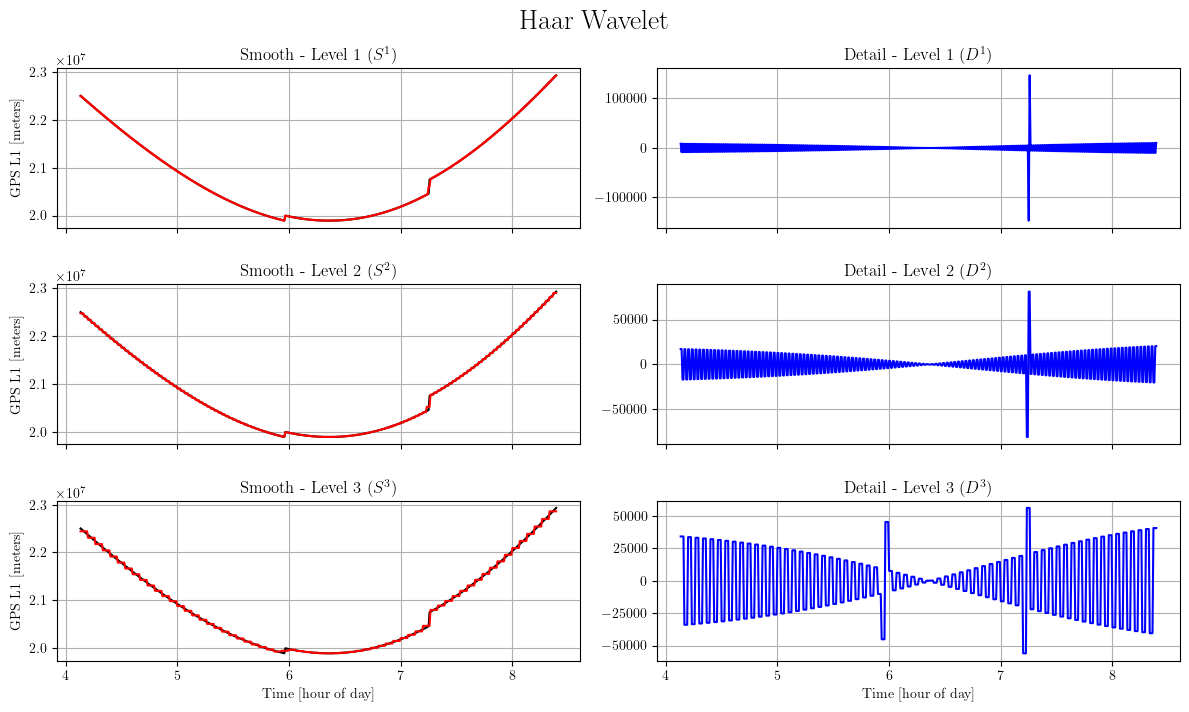

In [4]:
import matplotlib.pyplot as plt


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# %matplotlib tk

n = len(S_haar)
plt.figure(figsize=(12,9))
for i in range(n):
    
    plt.subplot(n+1, 2, i*2+1)
    plt.plot(Time, Signal,linestyle='-', color='k', label = 'Original Signal')
    plt.plot(Time, S_haar[i],linestyle='-', color='r', label = f'Smoothed Signal ($S^{i+1}$)')
    plt.ylabel('GPS L1 [meters]')
    plt.grid()
    plt.title(f'Smooth - Level {i+1} ($S^{i+1}$)')
    if i == n-1:
        plt.xlabel('Time [hour of day]')
    else:
        plt.gca().set_xticklabels([])
    

    plt.subplot(n+1, 2, i*2+2)
    plt.plot(Time, D_haar[i],linestyle='-', color='b', label = f'Details ($D^{i+1}$)')
    plt.grid()
    plt.title(f'Detail - Level {i+1} ($D^{i+1}$)')
    if i == n-1:
        plt.xlabel('Time [hour of day]')  
    else:
        plt.gca().set_xticklabels([])

plt.suptitle('Haar Wavelet', fontsize=20)
plt.tight_layout()
if SAVE_OUNTPUTS:
    plt.savefig(OUTPUT_DIR+'/CycleSlip_Haar'+OUTPUT_FORMAT, bbox_inches='tight')
plt.show()

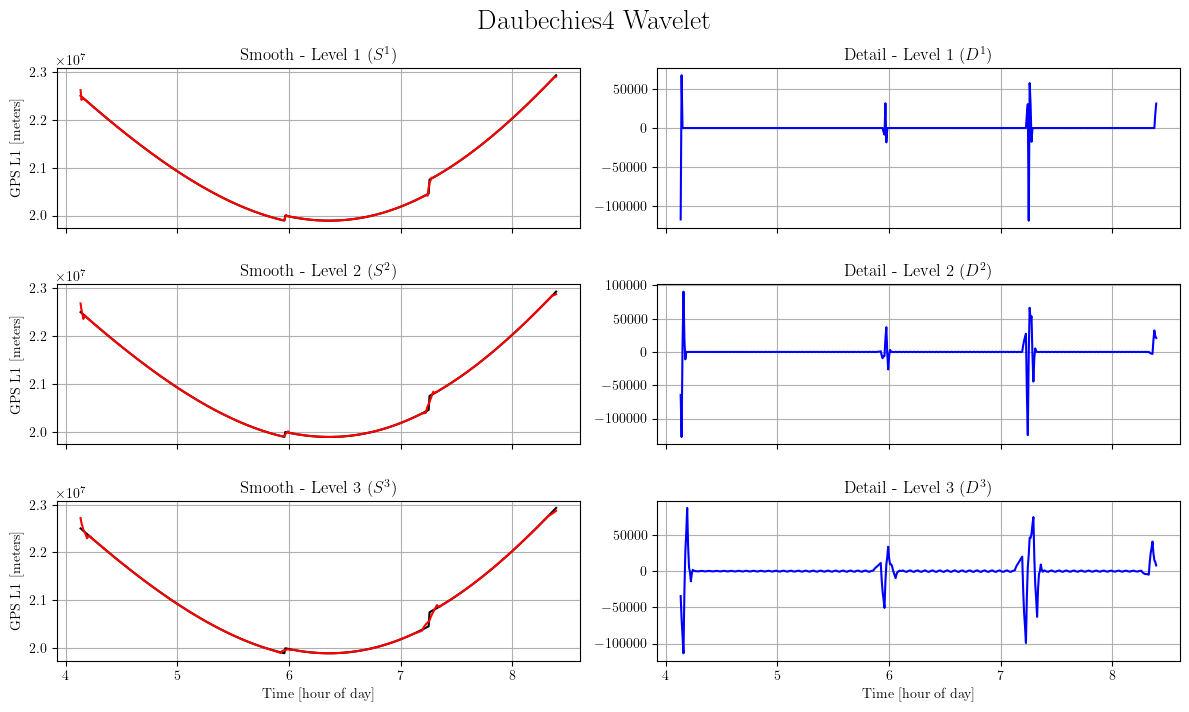

In [5]:
import matplotlib.pyplot as plt


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# %matplotlib tk

n = len(S_db4)
plt.figure(figsize=(12,9))
for i in range(n):
    
    plt.subplot(n+1, 2, i*2+1)
    plt.plot(Time, Signal,linestyle='-', color='k', label = 'Original Signal')
    plt.plot(Time, S_db4[i],linestyle='-', color='r', label = f'Smoothed Signal ($S^{i+1}$)')
    plt.ylabel('GPS L1 [meters]')
    plt.grid()
    plt.title(f'Smooth - Level {i+1} ($S^{i+1}$)')
    if i == n-1:
        plt.xlabel('Time [hour of day]')
    else:
        plt.gca().set_xticklabels([])
    

    plt.subplot(n+1, 2, i*2+2)
    plt.plot(Time, D_db4[i],linestyle='-', color='b', label = f'Details ($D^{i+1}$)')
    plt.grid()
    plt.title(f'Detail - Level {i+1} ($D^{i+1}$)')
    if i == n-1:
        plt.xlabel('Time [hour of day]')  
    else:
        plt.gca().set_xticklabels([])

plt.suptitle('Daubechies4 Wavelet', fontsize=20)
plt.tight_layout()
if SAVE_OUNTPUTS:
    plt.savefig(OUTPUT_DIR+'/CycleSlip_Daubechies4'+OUTPUT_FORMAT, bbox_inches='tight')
plt.show()

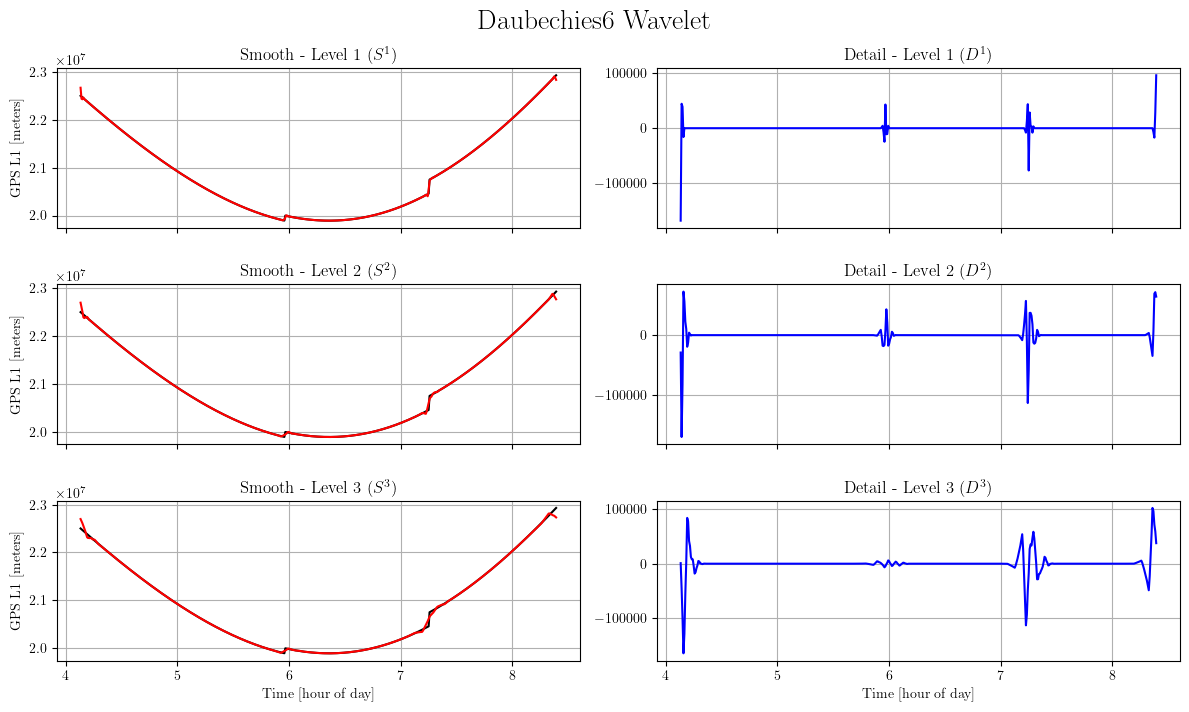

In [6]:
import matplotlib.pyplot as plt


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# %matplotlib tk

n = len(S_db6)
plt.figure(figsize=(12,9))
for i in range(n):
    
    plt.subplot(n+1, 2, i*2+1)
    plt.plot(Time, Signal,linestyle='-', color='k', label = 'Original Signal')
    plt.plot(Time, S_db6[i],linestyle='-', color='r', label = f'Smoothed Signal ($S^{i+1}$)')
    plt.ylabel('GPS L1 [meters]')
    plt.grid()
    plt.title(f'Smooth - Level {i+1} ($S^{i+1}$)')
    if i == n-1:
        plt.xlabel('Time [hour of day]')
    else:
        plt.gca().set_xticklabels([])
    

    plt.subplot(n+1, 2, i*2+2)
    plt.plot(Time, D_db6[i],linestyle='-', color='b', label = f'Details ($D^{i+1}$)')
    plt.grid()
    plt.title(f'Detail - Level {i+1} ($D^{i+1}$)')
    if i == n-1:
        plt.xlabel('Time [hour of day]')  
    else:
        plt.gca().set_xticklabels([])

plt.suptitle('Daubechies6 Wavelet', fontsize=20)
plt.tight_layout()
if SAVE_OUNTPUTS:
    plt.savefig(OUTPUT_DIR+'/CycleSlip_Daubechies6'+OUTPUT_FORMAT, bbox_inches='tight')
plt.show()

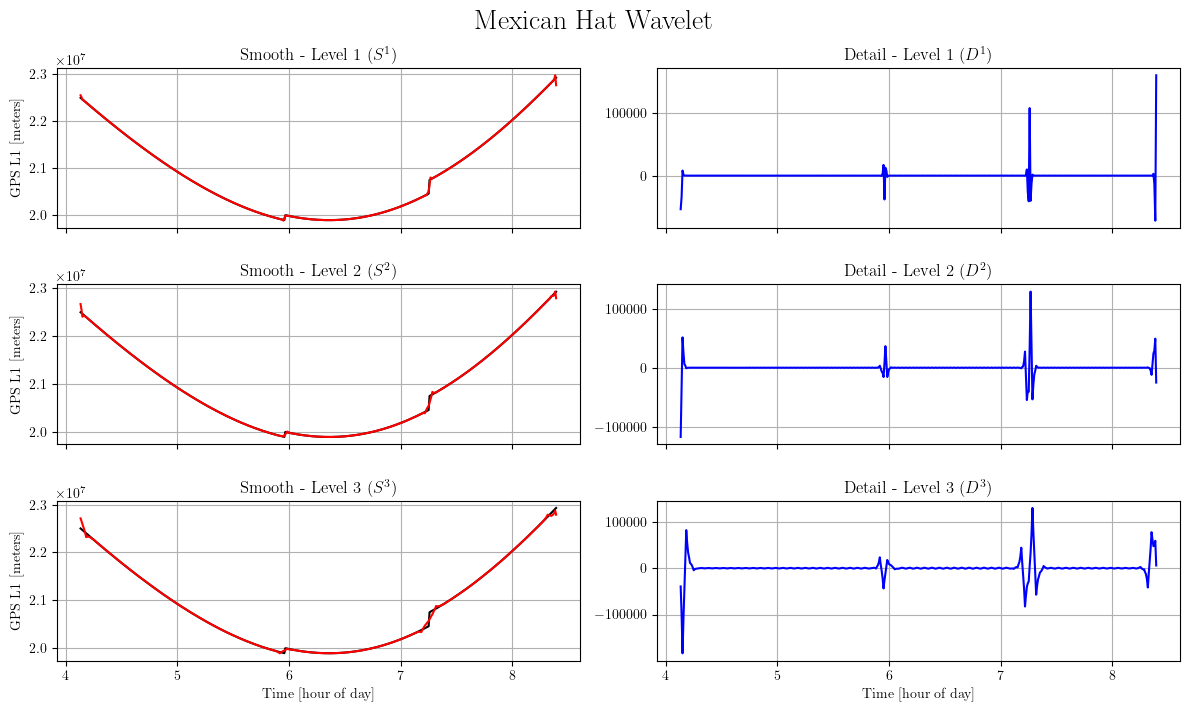

In [7]:
import matplotlib.pyplot as plt


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# %matplotlib tk

n = len(S_mh)
plt.figure(figsize=(12,9))
for i in range(n):
    
    plt.subplot(n+1, 2, i*2+1)
    plt.plot(Time, Signal,linestyle='-', color='k', label = 'Original Signal')
    plt.plot(Time, S_mh[i],linestyle='-', color='r', label = f'Smoothed Signal ($S^{i+1}$)')
    plt.ylabel('GPS L1 [meters]')
    plt.grid()
    plt.title(f'Smooth - Level {i+1} ($S^{i+1}$)')
    if i == n-1:
        plt.xlabel('Time [hour of day]')
    else:
        plt.gca().set_xticklabels([])
    

    plt.subplot(n+1, 2, i*2+2)
    plt.plot(Time, D_mh[i],linestyle='-', color='b', label = f'Details ($D^{i+1}$)')
    plt.grid()
    plt.title(f'Detail - Level {i+1} ($D^{i+1}$)')
    if i == n-1:
        plt.xlabel('Time [hour of day]')  
    else:
        plt.gca().set_xticklabels([])

plt.suptitle('Mexican Hat Wavelet', fontsize=20)
plt.tight_layout()
if SAVE_OUNTPUTS:
    plt.savefig(OUTPUT_DIR+'/CycleSlip_MexicanHat'+OUTPUT_FORMAT, bbox_inches='tight')
plt.show()

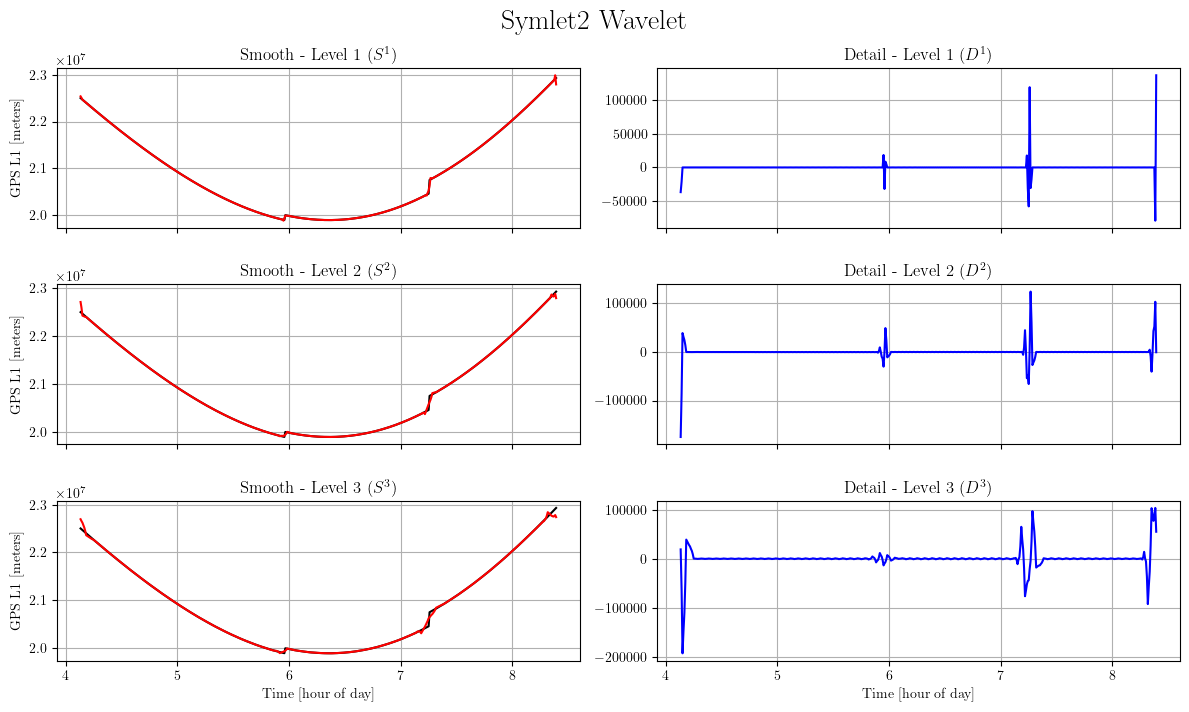

In [8]:
import matplotlib.pyplot as plt


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# %matplotlib tk

n = len(S_sym2)
plt.figure(figsize=(12,9))
for i in range(n):
    
    plt.subplot(n+1, 2, i*2+1)
    plt.plot(Time, Signal,linestyle='-', color='k', label = 'Original Signal')
    plt.plot(Time, S_sym2[i],linestyle='-', color='r', label = f'Smoothed Signal ($S^{i+1}$)')
    plt.ylabel('GPS L1 [meters]')
    plt.grid()
    plt.title(f'Smooth - Level {i+1} ($S^{i+1}$)')
    if i == n-1:
        plt.xlabel('Time [hour of day]')
    else:
        plt.gca().set_xticklabels([])
    

    plt.subplot(n+1, 2, i*2+2)
    plt.plot(Time, D_sym2[i],linestyle='-', color='b', label = f'Details ($D^{i+1}$)')
    plt.grid()
    plt.title(f'Detail - Level {i+1} ($D^{i+1}$)')
    if i == n-1:
        plt.xlabel('Time [hour of day]')  
    else:
        plt.gca().set_xticklabels([])

plt.suptitle('Symlet2 Wavelet', fontsize=20)
plt.tight_layout()
if SAVE_OUNTPUTS:
    plt.savefig(OUTPUT_DIR+'/CycleSlip_Symlet2'+OUTPUT_FORMAT, bbox_inches='tight')
plt.show()

In [9]:
import numpy as np


tmp = D_haar[0]; tmp[:10] = np.zeros(10); tmp[-10:] = np.zeros(10)
cs_idx = np.where((tmp > np.mean(tmp) + 3*np.std(tmp)) | (tmp < np.mean(tmp) - 3*np.std(tmp)))
cs_idx_values = ', '.join(str(idx) for idx in cs_idx)
time_values = ', '.join(f'{time[0]:.2f}' for time in Time[cs_idx]) 
print(f'Using Haar Detail Level 1 - The cycle slip was detected in the time indices of {cs_idx_values} ({time_values} hour of day)')

tmp = D_db4[0]; tmp[:10] = np.zeros(10); tmp[-10:] = np.zeros(10)
cs_idx = np.where((tmp > np.mean(tmp) + 3*np.std(tmp)) | (tmp < np.mean(tmp) - 3*np.std(tmp)))
cs_idx_values = ', '.join(str(idx) for idx in cs_idx)
time_values = ', '.join(f'{time[0]:.2f}' for time in Time[cs_idx]) 
print(f'Using Db4 Detail Level 1 - The cycle slip was detected in the time indices of {cs_idx_values} ({time_values} hour of day)')

tmp = D_db6[0]; tmp[:10] = np.zeros(10); tmp[-10:] = np.zeros(10)
cs_idx = np.where((tmp > np.mean(tmp) + 3*np.std(tmp)) | (tmp < np.mean(tmp) - 3*np.std(tmp)))
cs_idx_values = ', '.join(str(idx) for idx in cs_idx)
time_values = ', '.join(f'{time[0]:.2f}' for time in Time[cs_idx]) 
print(f'Using Db6 Detail Level 1 - The cycle slip was detected in the time indices of {cs_idx_values} ({time_values} hour of day)')

tmp = D_mh[0]; tmp[:10] = np.zeros(10); tmp[-10:] = np.zeros(10)
cs_idx = np.where((tmp > np.mean(tmp) + 3*np.std(tmp)) | (tmp < np.mean(tmp) - 3*np.std(tmp)))
cs_idx_values = ', '.join(str(idx) for idx in cs_idx)
time_values = ', '.join(f'{time[0]:.2f}' for time in Time[cs_idx]) 
print(f'Using Mexican Hat Detail Level 1 - The cycle slip was detected in the time indices of {cs_idx_values} ({time_values} hour of day)')

tmp = D_sym2[0]; tmp[:10] = np.zeros(10); tmp[-10:] = np.zeros(10)
cs_idx = np.where((tmp > np.mean(tmp) + 3*np.std(tmp)) | (tmp < np.mean(tmp) - 3*np.std(tmp)))
cs_idx_values = ', '.join(str(idx) for idx in cs_idx)
time_values = ', '.join(f'{time[0]:.2f}' for time in Time[cs_idx]) 
print(f'Using Symlet2 Detail Level 1 - The cycle slip was detected in the time indices of {cs_idx_values} ({time_values} hour of day)')

Using Haar Detail Level 1 - The cycle slip was detected in the time indices of [374 375] (7.25, 7.26 hour of day)
Using Db4 Detail Level 1 - The cycle slip was detected in the time indices of [220 373 374 375 376] (5.97, 7.24, 7.25, 7.26, 7.27 hour of day)
Using Db6 Detail Level 1 - The cycle slip was detected in the time indices of [219 220 373 374 375] (5.96, 5.97, 7.24, 7.25, 7.26 hour of day)
Using Mexican Hat Detail Level 1 - The cycle slip was detected in the time indices of [219 373 374 375 376] (5.96, 7.24, 7.25, 7.26, 7.27 hour of day)
Using Symlet2 Detail Level 1 - The cycle slip was detected in the time indices of [219 373 374 375 376] (5.96, 7.24, 7.25, 7.26, 7.27 hour of day)
